In [3]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import scipy

In [5]:
0# RECEBER OS DADOS:
print("Dados 1")
Trabalho1 = {"m":3.00, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados 2")
Trabalho2 = {"m":4.50, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados 3")
Trabalho3 = {"m":6.00, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados 4")
Trabalho4 = {"m":7.50, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados cimento")
DadosCimento = {"MassaEspecifica":float(input("Massa especifica")), "Custo":float(input("Custo"))}
DdosExtras = { "TeorArgS": 0.55, "DP": 3, "Consistencia":"Classe S100", "Areia":{"MU":1500, "ME":2630, "Custo":70, "Inchamento": 0.29}, "Brita":{"MU":1450, "ME":2950, "Custo":62}}    

Dados 1
Relaçãoa/c0.36
Resistencia28C163.5
Resistencia28C261.6
Dados 2
Relaçãoa/c0.5
Resistencia28C146.9
Resistencia28C246.1
Dados 3
Relaçãoa/c0.63
Resistencia28C132.6
Resistencia28C233.5
Dados 4
Relaçãoa/c0.79
Resistencia28C122.8
Resistencia28C223.2
Dados cimento
Massa especifica3.09
Custo700


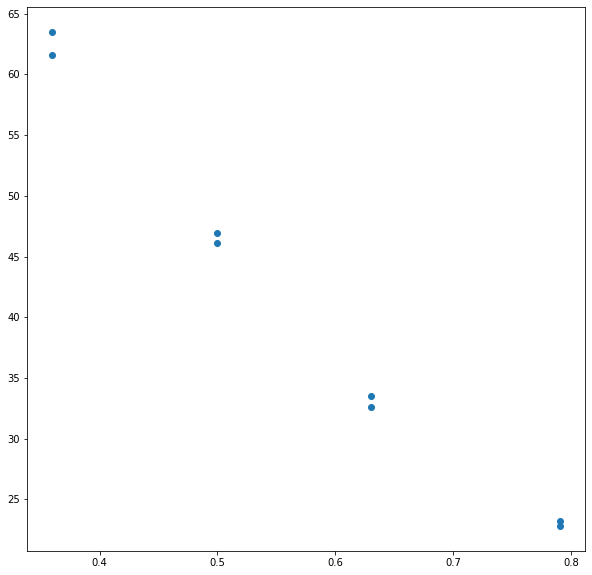

In [6]:
#UNIR EM UM ARRAY E PLOTAR 
Dadosac = np.array((float(Trabalho1["Relaçãoa/c"]),float(Trabalho1["Relaçãoa/c"]),float(Trabalho2["Relaçãoa/c"]),float(Trabalho2["Relaçãoa/c"]),float(Trabalho3["Relaçãoa/c"]),float(Trabalho3["Relaçãoa/c"]),float(Trabalho4["Relaçãoa/c"]),float(Trabalho4["Relaçãoa/c"])))
DadosRes = np.array((float(Trabalho1["Resistencia28C1"]),float(Trabalho1["Resistencia28C2"]),float(Trabalho2["Resistencia28C1"]),float(Trabalho2["Resistencia28C2"]),float(Trabalho3["Resistencia28C1"]),float(Trabalho3["Resistencia28C2"]),float(Trabalho4["Resistencia28C1"]),float(Trabalho4["Resistencia28C2"])))
Dadosm = np.array((float(Trabalho1["m"]),float(Trabalho1["m"]),float(Trabalho2["m"]),float(Trabalho2["m"]),float(Trabalho3["m"]),float(Trabalho3["m"]),float(Trabalho4["m"]),float(Trabalho4["m"])))
plt.figure(figsize=(10,10))
plt.scatter(Dadosac,DadosRes)

In [43]:
Dadosac

array([0.36, 0.36, 0.5 , 0.5 , 0.63, 0.63, 0.79, 0.79])

In [23]:
AP = ['A', 'P']
DdosExtras = { "TeorArgS": 0.55, "DP": 3, "Consistencia":"Classe S100", "Areia":{"MU":1500, "ME":2630, "Custo":70, "Inchamento": 0.29}, "Brita":{"MU":1450, "ME":2950, "Custo":62}}    

In [8]:
#CLASSES DE AGRESSIVIDADE
ClasseI = {"a/c":[0.65, 0.6], "Classe":[20,25],"CC":260}
ClasseII = {"a/c":[0.6,0.55], "Classe":[25,30],"CC":280}
ClasseIII = {"a/c":[0.55,0.50], "Classe":[30,35],"CC":320}
ClasseIV = {"a/c":[0.45,0.45], "Classe":[40,40],"CC":360}
ClassesAgr = [ClasseI,ClasseII,ClasseIII,ClasseIV]
#ADITIVO X REDUCAO DA QUANTIDADE DE AGUA
Aditivo  = [0.002, 0.004, 0.006, 0.008, 0.01]
RedAgua = [0.08, 0.09, 0.11, 0.13, 0.16] 
MEaditivo = 1.2
Custoaditivo = 6

In [9]:
#FIT DA CURVA LOGARITIMICA
Dadosacfit = np.copy(Dadosac)
Dadosacfit = Dadosacfit.reshape((8,1))
constantes = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  Dadosac,  DadosRes)

In [48]:
Soma = 0
for i in range(0,8):
  Soma = Soma + (DadosRes[i] - (constantes[0][0] + constantes[0][1]*np.log(Dadosac[i])))**2
soma1 = 0
MediaRes = np.sum(DadosRes)
for i in range(0,8):
  soma1 = Soma + (MediaRes/8 - DadosRes[i])**2
print('R2 = ', (soma1 - Soma)/soma1)


R2 =  0.982052769231181


In [11]:
print(constantes[0][0], constantes[0][1])

10.509310689334153 -51.00928059656361


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


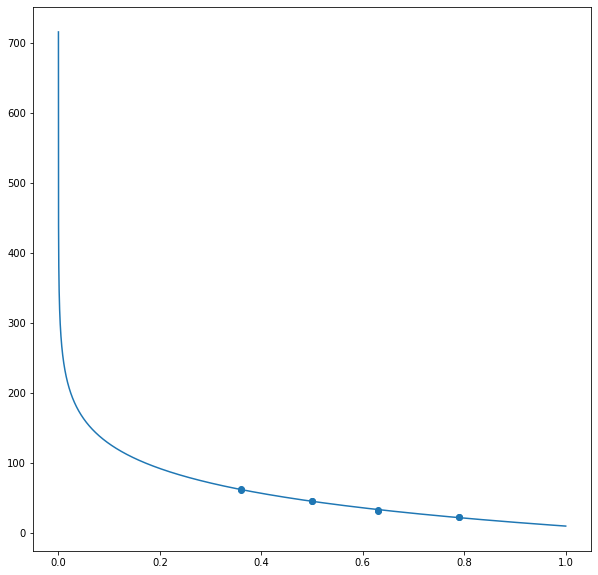

In [16]:
#PLOT DA CURVA
xfit = np.arange(0,1,0.000001)
yfit = constantes[0][0] + constantes[0][1]*np.log(xfit)
plt.figure(figsize=(10,10))
plt.plot(xfit,yfit)
plt.scatter(Dadosac,DadosRes)

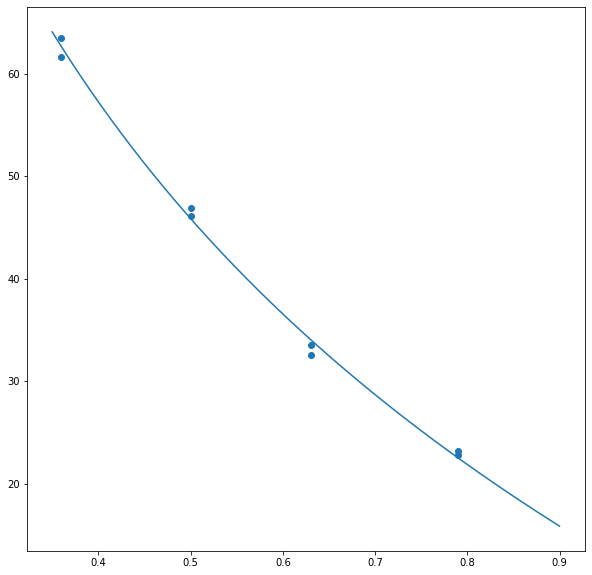

In [17]:
#PLOT DA CURVA COM ZOOM
xzoomfit = np.arange(0.35,0.9,0.0002)
yzoomfit = constantes[0][0] + constantes[0][1]*np.log(xzoomfit)
plt.figure(figsize=(10,10))
plt.plot(xzoomfit,yzoomfit)
plt.scatter(Dadosac,DadosRes)

In [39]:
#TESTE A/C FCM
Finalac = np.zeros((4,2))
for i in range(0,4):
    for j in range(0,2):
        for idealac in range(0,1000000):
            if(yfit[idealac]>=ClassesAgr[i]["Classe"][j] + 1.65  * DdosExtras["DP"]):
              Finalac[i,j] = idealac/100000
            else:
              print('Classe',i+1,AP[j],'\n',"Resistencia obtida:",yfit[idealac],'A/c ideal:', idealac/1000000,'Resistencia minima:',ClassesAgr[i]["Classe"][j] + 1.65  * DdosExtras["DP"])
              break

Classe 1 A 
 Resistencia obtida: 24.94993238826614 A/c ideal: 0.753446 Resistencia minima: 24.95
Classe 1 P 
 Resistencia obtida: 29.94996122801198 A/c ideal: 0.683096 Resistencia minima: 29.95
Classe 2 A 
 Resistencia obtida: 29.94996122801198 A/c ideal: 0.683096 Resistencia minima: 29.95
Classe 2 P 
 Resistencia obtida: 34.94996117825756 A/c ideal: 0.619315 Resistencia minima: 34.95
Classe 3 A 
 Resistencia obtida: 34.94996117825756 A/c ideal: 0.619315 Resistencia minima: 34.95
Classe 3 P 
 Resistencia obtida: 39.94998497147401 A/c ideal: 0.561489 Resistencia minima: 39.95
Classe 4 A 
 Resistencia obtida: 44.94993519240339 A/c ideal: 0.509063 Resistencia minima: 44.95
Classe 4 P 
 Resistencia obtida: 44.94993519240339 A/c ideal: 0.509063 Resistencia minima: 44.95


In [40]:
print("Teste a/c maximo : a/c para resistencia minima")
for i in range(0,4):
    for j in range(0,2):
        if(Finalac[i,j]/10<=(ClassesAgr[i]["a/c"][j])):
            print("Aprovado")
            print('Classe', i, j,'apovado', Finalac[i,j],(ClassesAgr[i]["a/c"][j]))
        else:
            print('',Finalac[i,j]/10,(ClassesAgr[i]["a/c"][j]), yfit[int(ClassesAgr[i]["a/c"][j]*1000000)])
            Finalac[i,j] = ClassesAgr[i]["a/c"][j]*100

Teste a/c maximo : a/c para resistencia minima
 0.7534449999999999 0.65 32.48323733250007
 0.683095 0.6 36.56615826792821
 0.683095 0.6 36.56615826792821
 0.6193139999999999 0.55 41.00454601188561
 0.6193139999999999 0.55 41.00454601188561
 0.561488 0.5 45.866249717233345
 0.509062 0.45 51.24061382422205
 0.509062 0.45 51.24061382422205


[[65. 60.]
 [60. 55.]
 [55. 50.]
 [45. 45.]]


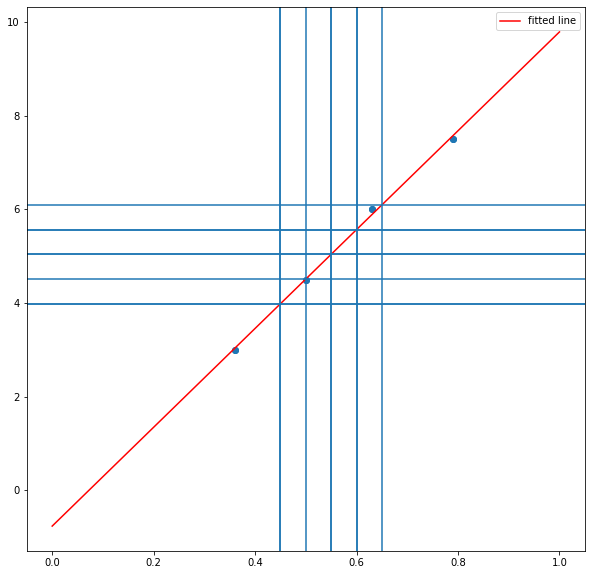

In [60]:
print(Finalac)
import matplotlib.pyplot as plt
from scipy import stats
todosm = np.arange(0,10,0.000001)

plt.figure(figsize=(10,10))
res = stats.linregress(Dadosac, Dadosm)
x = np.arange(0,1,0.0000001)
mac = res.intercept + res.slope*x
macfinal = np.zeros((4,2))
for i in range(0,4):
    for j in range(0,2):
        macfinal[i,j] = mac[int(100000*Finalac[i,j])]
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
for i in range(0,4):
    for j in range(0,2):
        txt = "i,j"
        plt.axvline(x = Finalac[i,j]/100)
        plt.axhline(y = mac[int(Finalac[i,j]*100000)])
plt.legend()
plt.scatter(Dadosac,Dadosm)
plt.show()

In [75]:
macfinalshape = macfinal.reshape((8,1))
print(macfinal, res.intercept, res.slope)

[[6.09356436 5.56633663]
 [5.56633663 5.03910891]
 [5.03910891 4.51188119]
 [3.98465347 3.98465347]] -0.7603960396039593 10.544554455445544


In [74]:
Somam = 0
for i in range(0,8):
  Somam = Somam + (Dadosm[i] - (res.intercept + res.slope*(macfinalshape[i])))**2
soma1m = 0
Mediam = np.sum(Dadosm)
for i in range(0,8):
  soma1m = Somam + (Mediam/8 - Dadosm[i])**2
print('R2 = ', 1 - (soma1m - Somam)/soma1m)


R2 =  [0.99971757]


In [62]:
Areia = np.zeros((4,2))
Pedra = np.zeros((4,2))
for i in range (0, 4):
  for j in range(0, 2):
    print(i,j)
    Areia[i,j] = float(DdosExtras["TeorArgS"])*(1+ macfinal[i,j])- 1
    Pedra[i,j] = macfinal[i,j] - Areia[i,j]

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1


In [149]:
print(Areia)
print(Pedra)

[[2.9014604  2.61148515]
 [2.61148515 2.3215099 ]
 [2.3215099  2.03153465]
 [1.74155941 1.74155941]]
[[3.19210396 2.95485149]
 [2.95485149 2.71759901]
 [2.71759901 2.48034653]
 [2.24309406 2.24309406]]


In [ ]:
print(constantes[0][0], constantes[0][1])

10.509310689334153 -51.00928059656361


In [77]:
for i in range(0,4):
    for j in range(0,2):
        print(ClassesAgr[i]["Classe"][j] + 1.65  * DdosExtras["DP"])

24.95
29.95
29.95
34.95
34.95
39.95
44.95
44.95


In [158]:
Areiateste = np.zeros(4)
Britateste = np.zeros(4)
m = [3, 4.5, 6, 7.5]
acteste = [0.36,0.5,0.63,0.79] 
for i in range (0, 4):
    Areiateste[i] = float(DdosExtras["TeorArgS"])*(1 + m[i])- 1
    Britateste[i] = m[i] - Areiateste[i]
print(Areiateste, Britateste)

[1.2   2.025 2.85  3.675] [1.8   2.475 3.15  3.825]


In [159]:
CC = np.zeros(4)
for i in range(0,4):
  CC[i] = 1000/((1/3.09)+(Areiateste[i]/2.63) + (Britateste[i]/2.95) + acteste[i])

In [160]:
SomaCC = 0
for i in range(0,4):
  SomaCC = SomaCC + (Dadosm[i*2+1] - (constantes[0][0] + constantes[0][1]*np.log(m[i])))**2
soma1CC = 0
Mediam = np.sum(Dadosm)/2
for i in range(0,4):
  soma1CC = SomaCC + (Mediam/4 - Dadosm[i*2+1])**2
print('R2 = ', 1-(soma1CC - SomaCC)/soma1CC)


R2 =  0.9981639084296434


In [161]:
Dadosm

array([3. , 3. , 4.5, 4.5, 6. , 6. , 7.5, 7.5])

In [163]:
DadosCCfit = np.copy(CC)
constantes = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  m,  CC)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


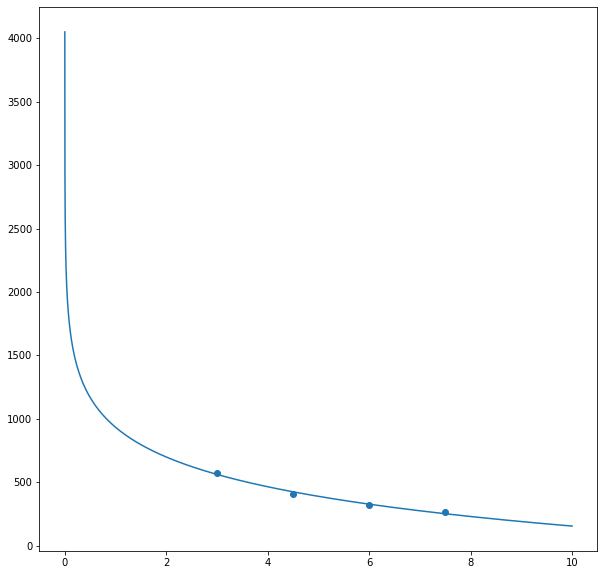

In [164]:
xfit = np.arange(0,10,0.0001)
yfit = constantes[0][0] + constantes[0][1]*np.log(xfit)
plt.figure(figsize=(10,10))
plt.plot(xfit,yfit)
plt.scatter(m,CC)

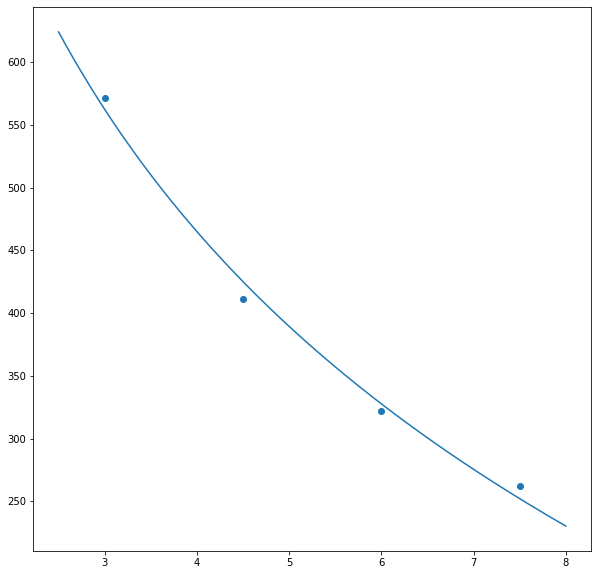

In [165]:
xzoomfit = np.arange(2.5,8,0.0002)
yzoomfit = constantes[0][0] + constantes[0][1]*np.log(xzoomfit)
plt.figure(figsize=(10,10))
plt.plot(xzoomfit,yzoomfit)
plt.scatter(m,CC)

In [166]:
for i in range(0,8):
    print(constantes[0][0] + constantes[0][1]*np.log(macfinalshape[i]))

[322.46155578]
[353.08434938]
[353.08434938]
[386.75663959]
[386.75663959]
[424.15363723]
[466.20304978]
[466.20304978]


In [167]:
ClasseI = {"a/c":[0.65, 0.6], "Classe":[20,25],"CC":260}
ClasseII = {"a/c":[0.6,0.55], "Classe":[25,30],"CC":280}
ClasseIII = {"a/c":[0.55,0.50], "Classe":[30,35],"CC":320}
ClasseIV = {"a/c":[0.45,0.45], "Classe":[40,40],"CC":360}

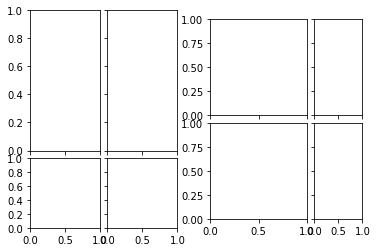

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure()

grid1 = ImageGrid(fig, 121, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)
for i in [0, 1]:
    grid1[i].set_aspect(2)

grid2 = ImageGrid(fig, 122, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)
for i in [1, 3]:
    grid2[i].set_aspect(2)

plt.show()

In [ ]:
Dadosac

array([0.41, 0.41, 0.54, 0.54, 0.68, 0.68, 0.83, 0.83])

In [ ]:
DadosRes

array([60.2, 58.9, 43.2, 41.5, 29.5, 31.3, 19.3, 21.3])

In [ ]:
MediaRes = np.sum(DadosRes)

In [ ]:
Soma = 0
for i in range(0,8):
  Soma = Soma + (DadosRes[i] - (constantes[0][0] + constantes[0][1]*np.log(Dadosac[i])))**2
print(Soma)
soma1 = 0
for i in range(0,8):
  soma1 = Soma + (MediaRes/8 - DadosRes[i])**2
print('R2 = ', (soma1 - Soma)/soma1)

10.77418856189476
R2 =  0.9634397365831551


In [143]:
for i in range(1,100000):
  if(56.1024/(1-np.cos(i*pi/180/100000))<408.5834/(2*np.sin(i*pi/180/100000))):
    print(56.1024/(1-np.cos(i*pi/180/100000)),408.5834/(2*np.sin(i*pi/180/100000)), i*pi/180/100000)
    break

In [129]:
56.1024/(1-np.cos(10*pi/180))

3692.830958125033

In [130]:
408.5834/(2*np.sin(10*pi/180))

1176.4690119112342

In [139]:
1.07204817*180/pi

61.423835575723395

In [145]:
56.1024/(1-np.cos(angulo*pi/360))

400.00586850326033

In [138]:
408.5834/(2*np.sin(angulo*pi/360))

232.6302415264429

In [144]:
np.sin(angulo*pi/360)

0.5107217601260233

In [141]:
np.cos(angulo*pi/180)

0.4783265674675534

In [147]:
Dadosac

array([0.36, 0.36, 0.5 , 0.5 , 0.63, 0.63, 0.79, 0.79])